# <span style="color:#0b486b">Deep Neural Networks</span>


## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation functions below, state its output range, find its derivative (show steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Exponential linear unit (ELU): $\text{ELU}(x)=\begin{cases}
0.1\left(\exp(x)-1\right) & \text{if}\,x\leq0\\
x & \text{if}\,x>0
\end{cases}$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

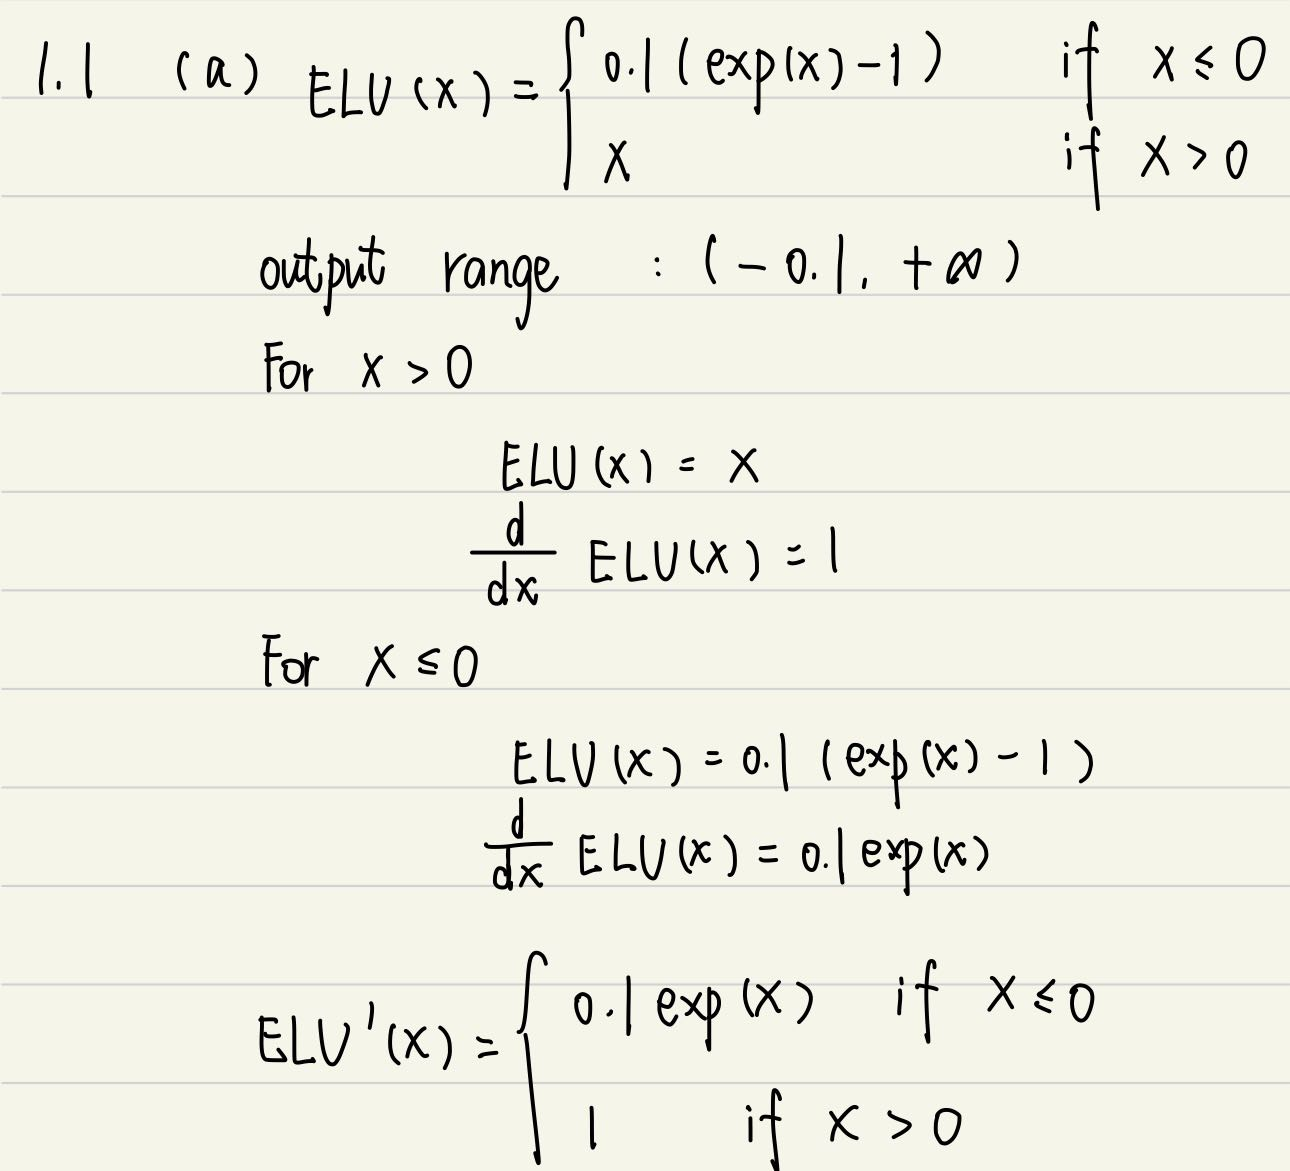

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter


In [ ]:
def plot_activation_function(ax, activation_function, axis=[], asymptote=[], crop_region=[], add_func=None, title=''):
    z = torch.linspace(-5, 5, 200)
    y = activation_function(z)

    ax.plot(z, y, "b-", linewidth=2)
    for axs in axis:
        ax.plot(axs[0], axs[1], 'k-')
    for ast in asymptote:
        ax.plot(ast[0], ast[1], 'k--')
    ax.grid(True)
    ax.axis(crop_region) if len(crop_region) else None
    add_func() if add_func else None
    ax.set_title(title, fontsize=14)


In [ ]:
def plot_activation_derivative(ax, activation_function, title):
    z = torch.linspace(-5, 5, 200, requires_grad=True)
    y = activation_function(z)
    y.backward(torch.ones_like(z))
    grads = z.grad

    ax.plot(z.detach(), grads.numpy(), "b-", linewidth=2)
    ax.plot([-5, 5], [0, 0], 'k-')
    ax.plot([0, 0], [-5, 5], 'k-')
    ax.grid(True)
    ax.set_title(title, fontsize=14)
    ax.axis([-5, 5, min(grads.numpy()) - 1E-2, max(grads.numpy()) + 1E-2])


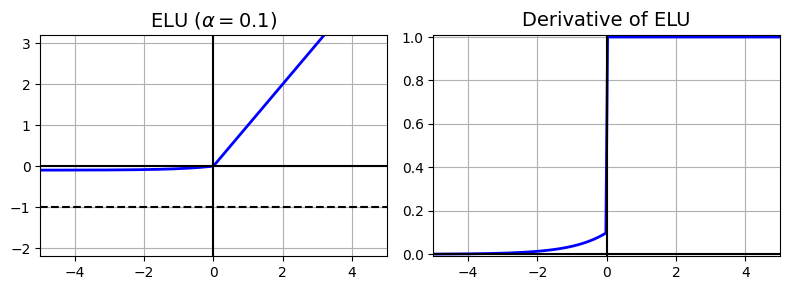

In [ ]:
class CustomELU(nn.Module):
	def __init__(self, alpha=0.1):
		super(CustomELU, self).__init__()
		self.alpha = alpha

	def forward(self, x):
		return torch.where(x < 0, self.alpha * (torch.exp(x) - 1), x)
activation_function = CustomELU()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
plot_activation_function(ax1, activation_function, axis=[[[-5, 5], [0, 0]], [[0, 0], [-5, 5]]],
                         asymptote=[[[-5, 5], [-1, -1]]], crop_region=[-5, 5, -2.2, 3.2], title=r"ELU ($\alpha=0.1$)")
plot_activation_derivative(ax2, activation_function, title="Derivative of ELU")
plt.tight_layout()
plt.show()

<span style="color:red">**(b)**</span> Gaussian Error Linear Unit (GELU): $\text{GELU}(x)=x\Phi(x)$ where $\Phi(x)$ is the `probability cummulative function` of the standard Gaussian distribution or $\Phi(x) = \mathbb{P}\left(X\leq x\right)$ where $X \sim N\left(0,1\right)$. In addition, the GELU activation fuction (the link for the [main paper](https://arxiv.org/pdf/1606.08415v5.pdf)) has been widely used in the state-of-the-art Vision for Transformers (e.g., here is the link for [the main ViT paper](https://arxiv.org/pdf/2010.11929v2.pdf)).
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

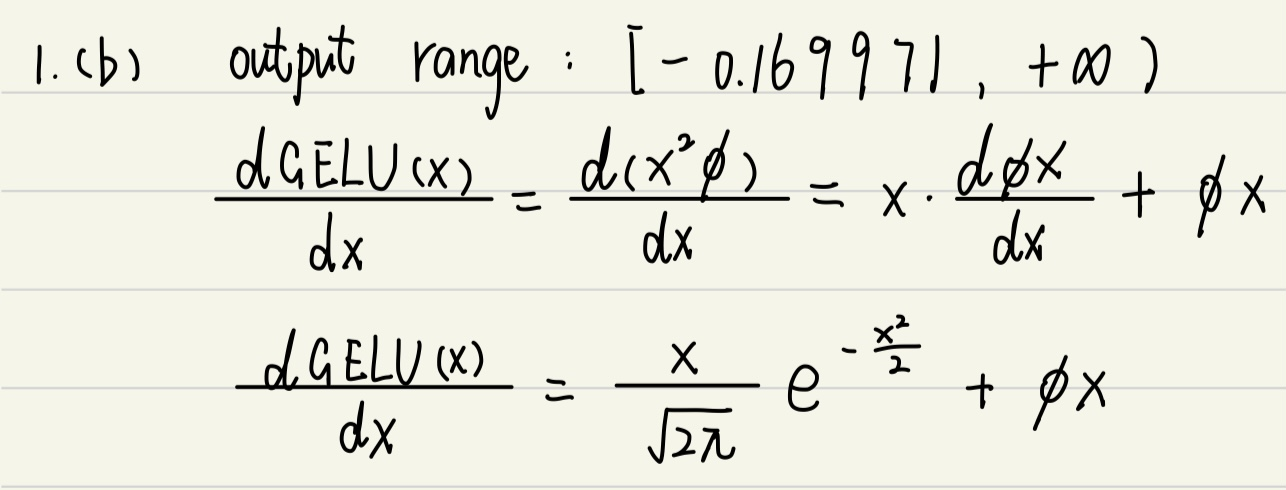

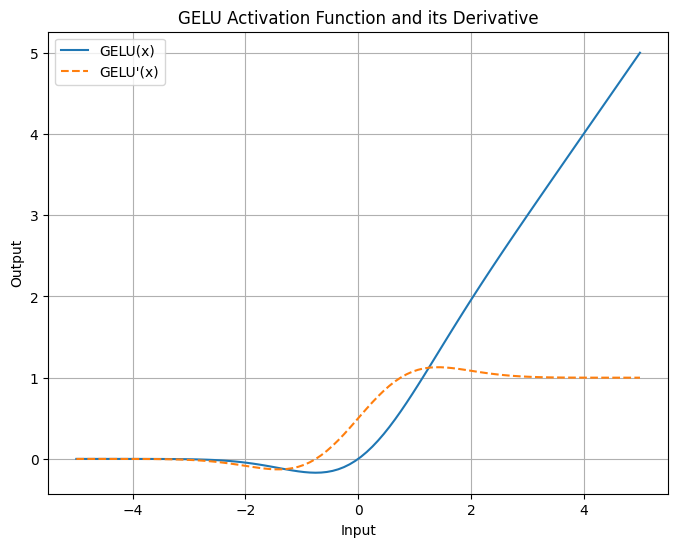

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

def gelu(x):
    """
    Gaussian Error Linear Unit (GELU) activation function.
    """
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

def gelu_derivative(x):
    """
    Derivative of the GELU activation function.
    """
    phi = np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)
    return 0.5 * (1 + erf(x / np.sqrt(2))) + (x * phi)

# Generate an array of inputs
x = np.linspace(-5, 5, 100)

# Apply GELU activation function and its derivative
y = gelu(x)
y_derivative = gelu_derivative(x)

# Plot the GELU function and its derivative
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='GELU(x)')
plt.plot(x, y_derivative, label="GELU'(x)", linestyle='--')
plt.title('GELU Activation Function and its Derivative')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()


####  <span style="color:red">**Question 1.2:**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=2$ to the feed-forward neural network with the `ReLU activation` function as shown in the following figure**


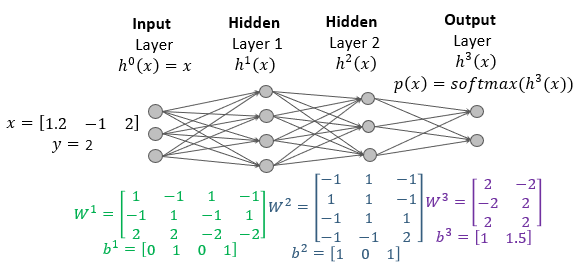

<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(e)**</span>  What is the predicted label $\widehat{y}$? Is it a correct and an incorect prediction? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


<span style="color:red">**(f)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

<span style="color:red">**(g)**</span>  Why is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$ (i.e., $\text{CE}(1_y, p(x))$) always non-negative? When does this $\text{CE}(1_y, p(x))$ loss get the value $0$? Note that you need to answer this question for a general pair $(x,y)$ and a general feed-forward neural network with, for example $M=4$ classes?   
<div style="text-align: right"><span style="color:red">[1 point]</span></div>


*You must show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your PyTorch code for your computation.*

In [ ]:
import torch
import torch.nn.functional as F

x = torch.tensor([1.2, -1, 2], dtype=torch.float32)
w1 = torch.tensor([[1, -1, 1, -1], [-1, 1, -1, 1], [2, 2, -2, -2]], dtype=torch.float32)
b1 = torch.tensor([0, 1, 0, 1], dtype=torch.float32)

h1 = torch.matmul(x, w1)  # Matrix multiplication
h1 = h1 + b1              # Adding bias
h1 = F.relu(h1)           # Applying ReLU using functional API
h1


tensor([6.2000, 2.8000, 0.0000, 0.0000])

In [ ]:


# Define the new weight matrix and bias for the next layer
w2 = torch.tensor([[-1, 1, -1], [1, 1, -1], [-1, 1, 1], [-1, -1, 2]], dtype=torch.float32)
b2 = torch.tensor([1, 0, 1], dtype=torch.float32)

# Perform matrix multiplication
h2 = torch.matmul(h1, w2)

# Add bias
h2 = h2 + b2

# Apply ReLU activation
h2 = F.relu(h2)

# Display the final output
h2

tensor([0., 9., 0.])

In [ ]:

# Define the new weight matrix and bias for the next layer
w3 = torch.tensor([[2, -2], [-2, 2], [2, 2]], dtype=torch.float32)
b3 = torch.tensor([1, 1.5], dtype=torch.float32)

# Perform matrix multiplication
h3 = torch.matmul(h2, w3)

# Add bias
h3 = h3 + b3

# Apply ReLU activation
h3 = F.relu(h3)

# Display the final output
h3


tensor([ 0.0000, 19.5000])

In [ ]:

# Apply the softmax function
p_x = torch.softmax(h3, dim=0)

# Display the output probabilities
p_x


tensor([3.3983e-09, 1.0000e+00])

In [ ]:
# Determine the predicted label
y_hat = torch.argmax(p_x).item()

# True label
y = 2

# Check if the prediction is correct
correct = (y_hat+1 == y)

y_hat+1, correct


(2, True)




The output (2, True) indicates the following:

Predicted Label (ŷ): The model predicted the label 2, which corresponds to the index with the highest probability in the p_x tensor.

Correct Prediction: The prediction is correct because the predicted label ŷ = 2 matches the true label y = 2.

Thus, in this case, the model has made a correct prediction.

In [ ]:
import torch

# Predicted probabilities
p_x = torch.tensor([0.0, 1.0], dtype=torch.float32)

# True label represented as a one-hot vector
true_label = torch.tensor(1)  # Index of the true class (0-based index)

# Compute cross-entropy loss manually
cross_entropy_loss = -torch.log(p_x[true_label])

# Print the cross-entropy loss
print(f"Cross-Entropy Loss: {cross_entropy_loss.item()}")


Cross-Entropy Loss: -0.0


The cross-entropy loss is a non-negative value that becomes zero only when the model's prediction is perfectly confident and correct for the true class. For any uncertainty or incorrect prediction, the loss will be positive, indicating the presence of error in the model's prediction. This characteristic ensures that the loss function appropriately penalizes incorrect or uncertain predictions, driving the model to improve during training.

####  <span style="color:red">**Question 1.3:**</span> **Manually implement a feed-forward neural network* that can work on real tabular datasets**

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**In Question 1.3, you need to implement a feed-forward NN manually using PyTorch and auto-differentiation of PyTorch. We then manually train the model on the MNIST dataset**.

We first download the `MNIST` dataset and preprocess it.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor with shape [C, H, W]
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Lambda(lambda x: x.view(28*28)) # Flatten the tensor to shape [-1,HW]
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


Each data point has dimension `[28,28]`. We need to flatten it to a vector to input to our FFN.

In [ ]:
train_dataset.data = train_data.data.view(-1, 28*28)
test_dataset.data = test_data.data.view(-1, 28*28)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

**Develop the feed-forward neural networks**

**(a)** You need to develop the class `MyLinear` with the following skeleton. You need to implement the weight matrix and the bias of your MyLinear manually.

<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyLinear(nn.Module):
    def __init__(self, input_size, output_size):
        """
        input_size: the size of the input
        output_size: the size of the output
        """
        super(MyLinear, self).__init__()
        # Initialize the weight matrix with random values and the bias with zeros
        self.W = nn.Parameter(torch.randn(input_size, output_size) * 0.01)
        self.b = nn.Parameter(torch.zeros(output_size))

    def forward(self, x):
        """
        Forward propagation.
        x: input tensor of shape [batch_size, input_size]
        Returns: output tensor of shape [batch_size, output_size]
        """
        return torch.matmul(x, self.W) + self.b

**(b)** You need to develop the class `MyFFN` with the following skeleton

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class MyFFN(nn.Module):
    def __init__(self, input_size, num_classes, hidden_sizes, act=torch.nn.ReLU()):
        super(MyFFN, self).__init__()
        self.input_size = input_size
        self.num_classes = num_classes
        self.act = act
        self.hidden_sizes = hidden_sizes
        self.num_layers = len(hidden_sizes) + 1
        self.create_FFN()

    def create_FFN(self):
        hidden_sizes = [self.input_size] + self.hidden_sizes + [self.num_classes]
        self.layers = nn.ModuleList()

        for i in range(len(self.hidden_sizes)):
            in_size = hidden_sizes[i]
            out_size = hidden_sizes[i + 1]
            self.layers.append(nn.Linear(in_size, out_size))
            self.layers.append(self.act)

        self.layers.append(nn.Linear(hidden_sizes[-2], hidden_sizes[-1]))

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers[:-1]:
            x = layer(x)
        x = self.layers[-1](x) 
        return F.softmax(x, dim=1)

    def compute_loss(self, x, y):
        logits = self.forward(x)
        return F.cross_entropy(logits, y)

    def update_SGD(self, x, y, learning_rate=0.01):
        loss = self.compute_loss(x, y)
        loss.backward()

        with torch.no_grad():
            for layer in self.layers:
                if isinstance(layer, nn.Linear):
                    layer.weight -= learning_rate * layer.weight.grad
                    layer.bias -= learning_rate * layer.bias.grad
                    layer.weight.grad.zero_()
                    layer.bias.grad.zero_()

    def update_SGDwithMomentum(self, x, y, learning_rate=0.01, momentum=0.9):
        if not hasattr(self, 'velocities'):
            # Only create velocities for Linear layers, not for activation layers
            self.velocities = [{'weight': torch.zeros_like(layer.weight), 'bias': torch.zeros_like(layer.bias)}
                            for layer in self.layers if isinstance(layer, nn.Linear)]

        loss = self.compute_loss(x, y)
        loss.backward()

        with torch.no_grad():
            velocity_index = 0  # Track which velocity corresponds to which layer
            for layer in self.layers:
                if isinstance(layer, nn.Linear):  # Only update Linear layers
                    # Update velocities
                    self.velocities[velocity_index]['weight'] = momentum * self.velocities[velocity_index]['weight'] - learning_rate * layer.weight.grad
                    self.velocities[velocity_index]['bias'] = momentum * self.velocities[velocity_index]['bias'] - learning_rate * layer.bias.grad

                    # Update weights and biases
                    layer.weight += self.velocities[velocity_index]['weight']
                    layer.bias += self.velocities[velocity_index]['bias']

                    # Zero the gradients
                    layer.weight.grad.zero_()
                    layer.bias.grad.zero_()

                    velocity_index += 1  # Move to the next Linear layer velocity

    def update_AdaGrad(self, x, y, learning_rate=0.01):
        """
        This function updates the model parameters using AdaGrad based on the batch (x, y).
        The update rule is implemented manually.
        """
        if not hasattr(self, 'grad_squares'):
            # Only create grad_squares for Linear layers, not for activation layers
            self.grad_squares = [{'weight': torch.zeros_like(layer.weight), 'bias': torch.zeros_like(layer.bias)}
                                for layer in self.layers if isinstance(layer, nn.Linear)]

        loss = self.compute_loss(x, y)
        loss.backward()  # Compute gradients

        with torch.no_grad():
            grad_index = 0  # Index to track which gradient square corresponds to which layer
            for layer in self.layers:
                if isinstance(layer, nn.Linear):  # Only update Linear layers
                    # Accumulate the sum of squares of the gradients
                    self.grad_squares[grad_index]['weight'] += layer.weight.grad ** 2
                    self.grad_squares[grad_index]['bias'] += layer.bias.grad ** 2

                    # Adjust the learning rate for each parameter
                    adjusted_lr_weight = learning_rate / (torch.sqrt(self.grad_squares[grad_index]['weight']) + 1e-8)
                    adjusted_lr_bias = learning_rate / (torch.sqrt(self.grad_squares[grad_index]['bias']) + 1e-8)

                    # Update the weights and biases
                    layer.weight -= adjusted_lr_weight * layer.weight.grad
                    layer.bias -= adjusted_lr_bias * layer.bias.grad

                    # Zero the gradients
                    layer.weight.grad.zero_()
                    layer.bias.grad.zero_()

                    grad_index += 1  # Move to the next Linear layer's grad_square accumulator

In [ ]:
myFFN = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = torch.nn.ReLU())
myFFN.create_FFN()
print(myFFN)

MyFFN(
  (act): ReLU()
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)


**(c)** Write the code to evaluate the accuracy of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [15]:
def compute_acc(model, data_loader):
  """
  This function computes the accuracy of the model on a data loader
  """

  correct = 0
  total = 0

  # Set the model to evaluation mode
  model.eval()

  # Disable gradient computation
  with torch.no_grad():
      for x_batch, y_batch in data_loader:
          # Forward pass to get predictions
          outputs = model(x_batch)

          # Get the predicted class with the highest score
          _, predicted = torch.max(outputs, 1)

          # Update total and correct counts
          total += y_batch.size(0)
          correct += (predicted == y_batch).sum().item()

  # Compute accuracy as a percentage
  accuracy = correct / total

  return accuracy

**(c)** Write the code to evaluate the loss of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
def compute_loss(model, data_loader):
  """
  This function computes the loss of the model on a data loader
  """
  total_loss = 0.0
  total_samples = 0

  # Set the model to evaluation mode
  model.eval()

  # Disable gradient computation
  with torch.no_grad():
      for x_batch, y_batch in data_loader:
          # Forward pass to get predictions
          outputs = model(x_batch)

          # Compute the loss for the current batch
          loss = model.compute_loss(x_batch, y_batch)

          # Accumulate the total loss and the number of samples
          total_loss += loss.item() * y_batch.size(0)
          total_samples += y_batch.size(0)

  # Compute the average loss across all batches
  avg_loss = total_loss / total_samples

  return avg_loss

Train on the `MNIST` data with 50 epochs using `updateSGD`.

In [ ]:
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_SGD(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 2.2442, Train Acc: 19.61%, Test Loss: 2.2426, Test Acc: 20.02%
Epoch 2/20, Train Loss: 1.9648, Train Acc: 55.18%, Test Loss: 1.9622, Test Acc: 55.12%
Epoch 3/20, Train Loss: 1.8294, Train Acc: 65.86%, Test Loss: 1.8255, Test Acc: 66.42%
Epoch 4/20, Train Loss: 1.8033, Train Acc: 66.90%, Test Loss: 1.8000, Test Acc: 67.24%
Epoch 5/20, Train Loss: 1.7595, Train Acc: 72.84%, Test Loss: 1.7577, Test Acc: 72.91%
Epoch 6/20, Train Loss: 1.6913, Train Acc: 81.26%, Test Loss: 1.6858, Test Acc: 81.96%
Epoch 7/20, Train Loss: 1.6616, Train Acc: 82.32%, Test Loss: 1.6559, Test Acc: 82.91%
Epoch 8/20, Train Loss: 1.6501, Train Acc: 82.86%, Test Loss: 1.6446, Test Acc: 83.26%
Epoch 9/20, Train Loss: 1.6423, Train Acc: 83.30%, Test Loss: 1.6375, Test Acc: 83.67%
Epoch 10/20, Train Loss: 1.6370, Train Acc: 83.47%, Test Loss: 1.6325, Test Acc: 83.81%
Epoch 11/20, Train Loss: 1.6328, Train Acc: 83.80%, Test Loss: 1.6279, Test Acc: 84.32%
Epoch 12/20, Train Loss: 1.6310, Train Ac

**(d)** Implement the function `updateSGDMomentum` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
device = torch.device("cpu")
model = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = torch.nn.ReLU())
model.create_FFN()
# print(model)
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      x, y = x.to(device), y.to(device)
      model.update_SGDwithMomentum( x, y, learning_rate = 0.01, momentum = 0.9)
    train_acc = compute_acc(model, train_loader)
    train_loss = compute_loss(model, train_loader)
    test_acc = compute_acc(model, test_loader)
    test_loss = compute_loss(model, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 1.6369, Train Acc: 83.21%, Test Loss: 1.6323, Test Acc: 83.61%
Epoch 2/20, Train Loss: 1.6205, Train Acc: 84.48%, Test Loss: 1.6174, Test Acc: 84.71%
Epoch 3/20, Train Loss: 1.6105, Train Acc: 85.33%, Test Loss: 1.6102, Test Acc: 85.31%
Epoch 4/20, Train Loss: 1.5440, Train Acc: 92.34%, Test Loss: 1.5463, Test Acc: 91.84%
Epoch 5/20, Train Loss: 1.5375, Train Acc: 92.94%, Test Loss: 1.5385, Test Acc: 92.68%
Epoch 6/20, Train Loss: 1.5252, Train Acc: 94.02%, Test Loss: 1.5264, Test Acc: 93.84%
Epoch 7/20, Train Loss: 1.5160, Train Acc: 94.90%, Test Loss: 1.5203, Test Acc: 94.24%
Epoch 8/20, Train Loss: 1.5144, Train Acc: 94.99%, Test Loss: 1.5196, Test Acc: 94.38%
Epoch 9/20, Train Loss: 1.5156, Train Acc: 94.87%, Test Loss: 1.5191, Test Acc: 94.45%
Epoch 10/20, Train Loss: 1.5030, Train Acc: 96.07%, Test Loss: 1.5087, Test Acc: 95.49%
Epoch 11/20, Train Loss: 1.5055, Train Acc: 95.88%, Test Loss: 1.5119, Test Acc: 95.16%
Epoch 12/20, Train Loss: 1.5016, Train Ac

**(e)** Implement the function `updateAdagrad` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
model1 = MyFFN(input_size = 28*28, num_classes = 10, hidden_sizes = [100, 100], act = torch.nn.ReLU())
model1.create_FFN()
# print(model1)
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      model1.update_AdaGrad(x, y, learning_rate=0.01)
    train_acc = compute_acc(model1, train_loader)
    train_loss = compute_loss(model1, train_loader)
    test_acc = compute_acc(model1, test_loader)
    test_loss = compute_loss(model1, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 1.5647, Train Acc: 90.55%, Test Loss: 1.5598, Test Acc: 91.12%
Epoch 2/20, Train Loss: 1.5503, Train Acc: 91.86%, Test Loss: 1.5470, Test Acc: 92.10%
Epoch 3/20, Train Loss: 1.5423, Train Acc: 92.53%, Test Loss: 1.5406, Test Acc: 92.62%
Epoch 4/20, Train Loss: 1.5350, Train Acc: 93.25%, Test Loss: 1.5351, Test Acc: 93.10%
Epoch 5/20, Train Loss: 1.5310, Train Acc: 93.56%, Test Loss: 1.5315, Test Acc: 93.38%
Epoch 6/20, Train Loss: 1.5277, Train Acc: 93.91%, Test Loss: 1.5284, Test Acc: 93.72%
Epoch 7/20, Train Loss: 1.5256, Train Acc: 94.12%, Test Loss: 1.5282, Test Acc: 93.70%
Epoch 8/20, Train Loss: 1.5244, Train Acc: 94.19%, Test Loss: 1.5274, Test Acc: 93.83%
Epoch 9/20, Train Loss: 1.5203, Train Acc: 94.57%, Test Loss: 1.5236, Test Acc: 94.11%
Epoch 10/20, Train Loss: 1.5195, Train Acc: 94.73%, Test Loss: 1.5226, Test Acc: 94.20%
Epoch 11/20, Train Loss: 1.5177, Train Acc: 94.80%, Test Loss: 1.5208, Test Acc: 94.47%
Epoch 12/20, Train Loss: 1.5170, Train Ac